Sailing The Seaborn! Below are the majority 4 topics here

1. Examine call volume and identify surge times, seasons, or events.
2. Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.
3. Assess regional and demographic trends in call content and call volume.
4. Determine the count and success rate of imminent risk calls.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I am importing these items as it is fortold in the python commandments

In [2]:
crisis1 = pd.read_excel('../data/NSSCrisisv1.xlsx', header=2)
crisis2 = pd.read_excel('../data/NSSCrisisv2.xlsx', header=2)

In [3]:
crisis1.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,96627022,Crisis,NaN,2021-12-31 23:35:00,2021-12-31 23:58:00,23,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,2021-12-31 23:29:00,2021-12-31 23:35:00,6,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,Crisis,NaN,2021-12-31 23:07:00,2021-12-31 23:28:00,21,1030262,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96626370,Crisis,NaN,2021-12-31 22:45:00,2021-12-31 22:55:00,10,2479348,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96625909,Crisis,NaN,2021-12-31 22:15:00,2021-12-31 22:44:00,29,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crisis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52876 entries, 0 to 52875
Columns: 313 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: datetime64[ns](3), float64(143), int64(6), object(161)
memory usage: 126.3+ MB


In [5]:
crisis1.describe(include='all')

C:\Users\phili\AppData\Local\Temp/ipykernel_20368/196603040.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crisis1.describe(include='all')


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
count,5.287600e+04,52876,2158,52876,52876,52876.000000,5.287600e+04,52876.000000,52876,0.0,...,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,3347,226
unique,NaN,3,1,49632,49582,NaN,NaN,NaN,52,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,2,6
top,NaN,Crisis,Yes,2021-04-09 15:26:00,2021-01-06 22:01:00,NaN,NaN,NaN,Lisa Crawford,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,No,Unknown
freq,NaN,50718,2158,4,4,NaN,NaN,NaN,6118,NaN,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,3118,78
first,NaN,NaN,NaN,2020-01-01 00:04:00,2020-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-12-31 23:35:00,2021-12-31 23:58:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.383222e+07,NaN,NaN,NaN,NaN,11.505560,5.454735e+05,123470.370792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.676511e+06,NaN,NaN,NaN,NaN,11.971267,1.029883e+06,32143.913485,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.949202e+07,NaN,NaN,NaN,NaN,0.000000,-2.000000e+00,53133.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.732412e+07,NaN,NaN,NaN,NaN,3.000000,-1.000000e+00,101461.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
crisis1.dropna(how='all', axis=1, inplace=True)

In [7]:
for label, content in crisis1.items():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')

label: CallReportNum
content: 0        96627022
1        96626934
2        96626654
3        96626370
4        96625909
           ...   
52871    69492892
52872    69492741
52873    69492019
52874    69492070
52875    69492055
Name: CallReportNum, Length: 52876, dtype: int64
label: ReportVersion
content: 0        Crisis
1        Crisis
2        Crisis
3        Crisis
4        Crisis
          ...  
52871    Crisis
52872    Crisis
52873    Crisis
52874    Crisis
52875    Crisis
Name: ReportVersion, Length: 52876, dtype: object
label: LinkedToCallReportNum
content: 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52871    NaN
52872    NaN
52873    NaN
52874    NaN
52875    NaN
Name: LinkedToCallReportNum, Length: 52876, dtype: object
label: CallDateAndTimeStart
content: 0       2021-12-31 23:35:00
1       2021-12-31 23:29:00
2       2021-12-31 23:07:00
3       2021-12-31 22:45:00
4       2021-12-31 22:15:00
                ...        
52871   2020-01-01 05:1

<AxesSubplot:xlabel='CallLength', ylabel='CRISIS Demographics - Marital Status'>

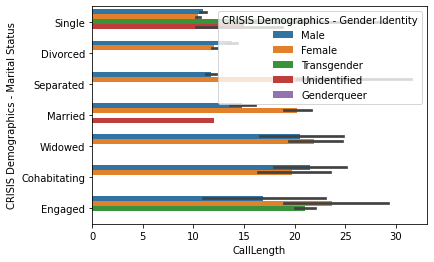

In [19]:
sns.barplot(data=crisis1, x="CallLength", y="CRISIS Demographics - Marital Status", hue="CRISIS Demographics - Gender Identity", )

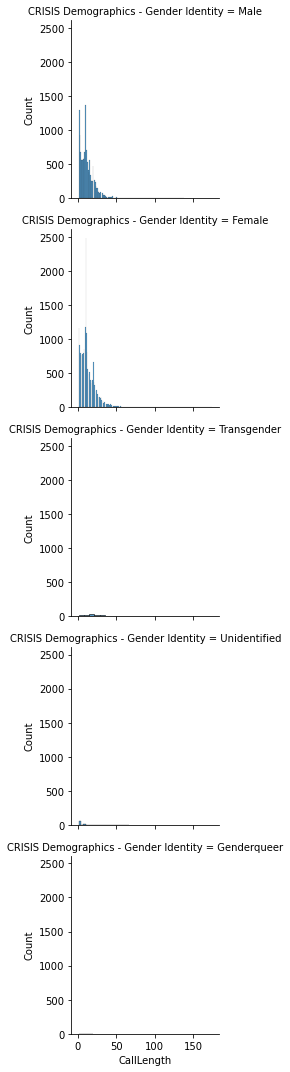

In [29]:
g = sns.FacetGrid(
    crisis1, 
    #col="CRISIS Demographics - Marital Status",
    row="CRISIS Demographics - Gender Identity"
    )
g.map_dataframe(sns.histplot, x="CallLength")
#g.fig.set_size_inches(18, 10)
#g.set_axis_labels("Total Bill", "Frequency")